In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [5]:
pd.set_option('display.max_columns',100)

# 1. Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [6]:
ser = pd.read_csv("student_evaluation_reduced.csv")

In [7]:
ser.head(5)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,8,1,0,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,3,8,1,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,13,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,3,5,1,0,1,1,1,1,1,1,1,1,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,3,3,1,3,4,2,2,4,2,3,3,3,2,3,3,3,4,4,4,4,3,4,4,4,4,3,4,3,3,3,3,2,4


In [8]:
ser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
instr         500 non-null int64
class         500 non-null int64
nb.repeat     500 non-null int64
attendance    500 non-null int64
difficulty    500 non-null int64
Q1            500 non-null int64
Q2            500 non-null int64
Q3            500 non-null int64
Q4            500 non-null int64
Q5            500 non-null int64
Q6            500 non-null int64
Q7            500 non-null int64
Q8            500 non-null int64
Q9            500 non-null int64
Q10           500 non-null int64
Q11           500 non-null int64
Q12           500 non-null int64
Q13           500 non-null int64
Q14           500 non-null int64
Q15           500 non-null int64
Q16           500 non-null int64
Q17           500 non-null int64
Q18           500 non-null int64
Q19           500 non-null int64
Q20           500 non-null int64
Q21           500 non-null int64
Q22           500 non-null int64
Q23 

## Dataset Description:

## percentage of each category in each column

In [13]:
for i in ser.columns:
    t = ser[i].value_counts().index
    t = t.sort_values()
    for j in t:
        print("percentage of ",j,end = "")
        f = (ser[i].value_counts()[j]/500)*100
        print(" in " ,i,end = "")
        print(" column is",f)
    print()
    

percentage of  1 in  instr column is 11.600000000000001
percentage of  2 in  instr column is 23.599999999999998
percentage of  3 in  instr column is 64.8

percentage of  1 in  class column is 5.0
percentage of  2 in  class column is 2.0
percentage of  3 in  class column is 14.6
percentage of  4 in  class column is 4.8
percentage of  5 in  class column is 12.2
percentage of  6 in  class column is 9.2
percentage of  7 in  class column is 2.6
percentage of  8 in  class column is 8.6
percentage of  9 in  class column is 8.4
percentage of  10 in  class column is 7.000000000000001
percentage of  11 in  class column is 7.8
percentage of  12 in  class column is 0.6
percentage of  13 in  class column is 17.2

percentage of  1 in  nb.repeat column is 84.39999999999999
percentage of  2 in  nb.repeat column is 9.8
percentage of  3 in  nb.repeat column is 5.800000000000001

percentage of  0 in  attendance column is 39.2
percentage of  1 in  attendance column is 15.0
percentage of  2 in  attendance 

## value counts of each column

for instr column
3    324
2    118
1     58
Name: instr, dtype: int64


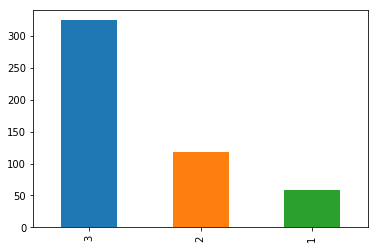

for class column
13    86
3     73
5     61
6     46
8     43
9     42
11    39
10    35
1     25
4     24
7     13
2     10
12     3
Name: class, dtype: int64


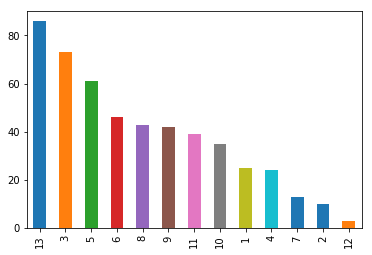

for nb.repeat column
1    422
2     49
3     29
Name: nb.repeat, dtype: int64


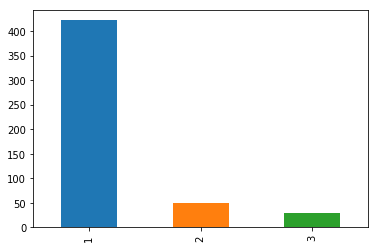

for attendance column
0    196
3    108
1     75
4     62
2     59
Name: attendance, dtype: int64


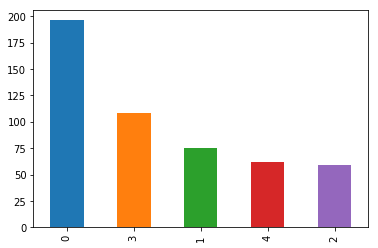

for difficulty column
3    160
1    151
4    100
5     54
2     35
Name: difficulty, dtype: int64


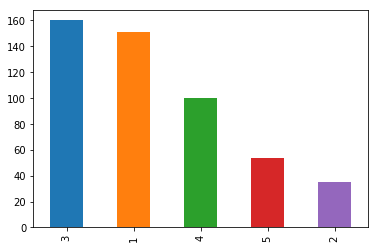

for Q1 column
3    135
1    106
4     97
5     89
2     73
Name: Q1, dtype: int64


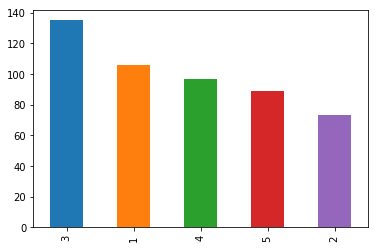

for Q2 column
3    139
4    121
5     89
1     81
2     70
Name: Q2, dtype: int64


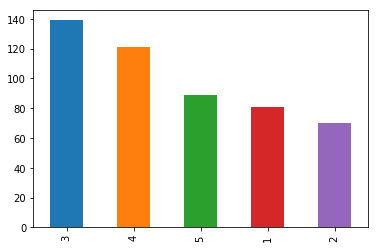

for Q3 column
3    141
4    130
5     95
1     75
2     59
Name: Q3, dtype: int64


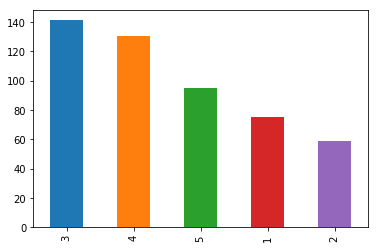

for Q4 column
3    127
4    123
5     92
1     87
2     71
Name: Q4, dtype: int64


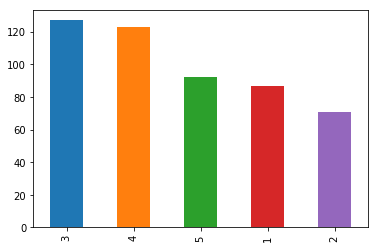

for Q5 column
3    134
4    119
5     93
1     79
2     75
Name: Q5, dtype: int64


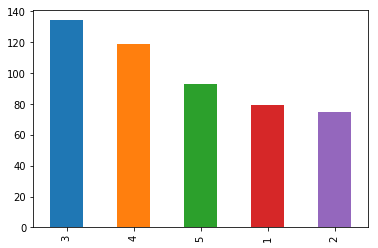

for Q6 column
3    143
4    127
5     89
1     84
2     57
Name: Q6, dtype: int64


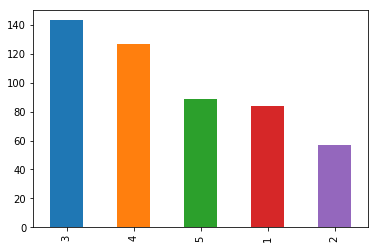

for Q7 column
3    140
4    114
5     90
1     87
2     69
Name: Q7, dtype: int64


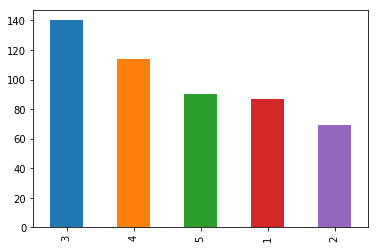

for Q8 column
3    136
4    106
5     91
1     90
2     77
Name: Q8, dtype: int64


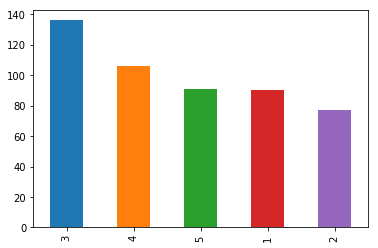

for Q9 column
3    149
4    122
5     93
1     77
2     59
Name: Q9, dtype: int64


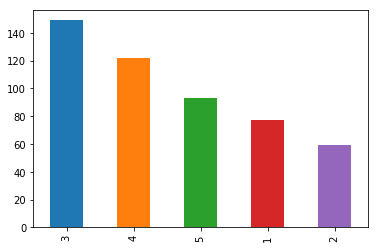

for Q10 column
3    158
4    113
5     92
1     78
2     59
Name: Q10, dtype: int64


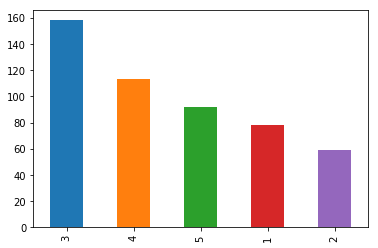

for Q11 column
3    136
4    122
5    101
1     81
2     60
Name: Q11, dtype: int64


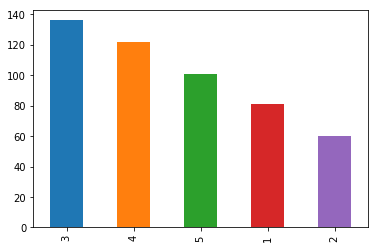

for Q12 column
3    156
4    103
1     89
5     86
2     66
Name: Q12, dtype: int64


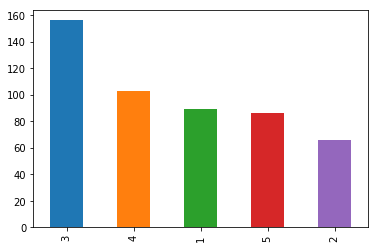

for Q13 column
4    140
3    129
5    102
1     72
2     57
Name: Q13, dtype: int64


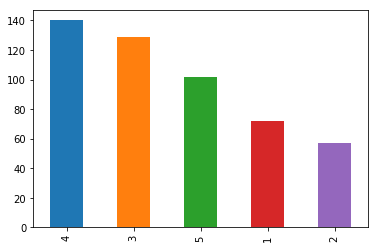

for Q14 column
4    145
3    132
5    106
1     68
2     49
Name: Q14, dtype: int64


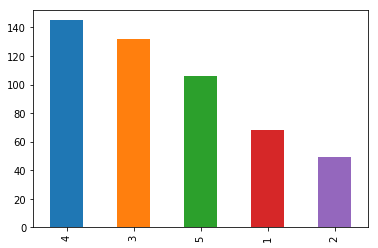

for Q15 column
4    137
3    136
5    107
1     70
2     50
Name: Q15, dtype: int64


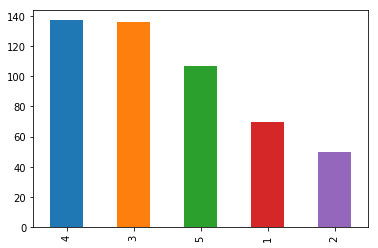

for Q16 column
3    144
4    111
5    107
1     81
2     57
Name: Q16, dtype: int64


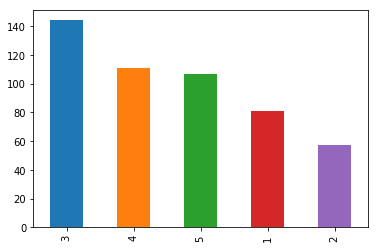

for Q17 column
4    149
5    119
3    119
1     67
2     46
Name: Q17, dtype: int64


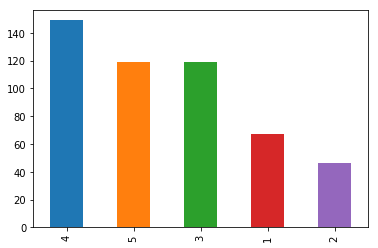

for Q18 column
3    142
4    125
5    101
1     77
2     55
Name: Q18, dtype: int64


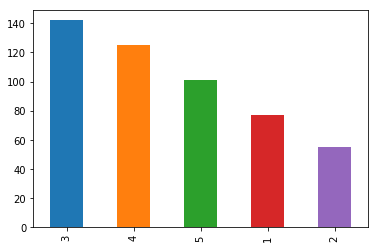

for Q19 column
4    134
3    134
5    113
1     69
2     50
Name: Q19, dtype: int64


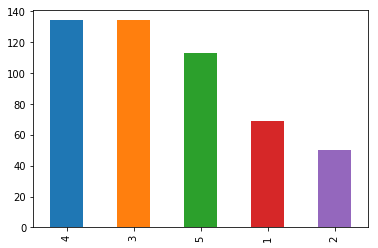

for Q20 column
3    135
4    128
5    117
1     70
2     50
Name: Q20, dtype: int64


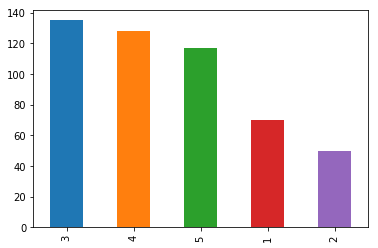

for Q21 column
3    141
4    131
5    115
1     67
2     46
Name: Q21, dtype: int64


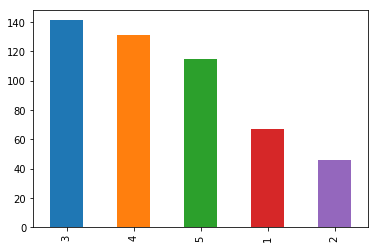

for Q22 column
4    142
3    128
5    112
1     68
2     50
Name: Q22, dtype: int64


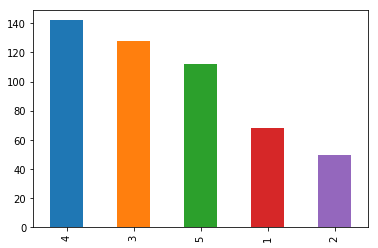

for Q23 column
3    143
4    114
5    102
1     73
2     68
Name: Q23, dtype: int64


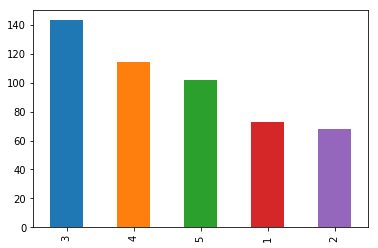

for Q24 column
3    130
4    112
5    105
1     78
2     75
Name: Q24, dtype: int64


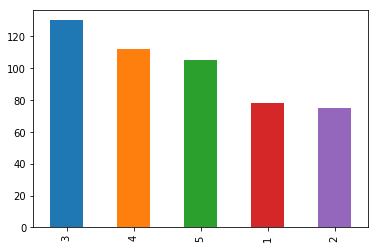

for Q25 column
4    139
3    123
5    114
1     69
2     55
Name: Q25, dtype: int64


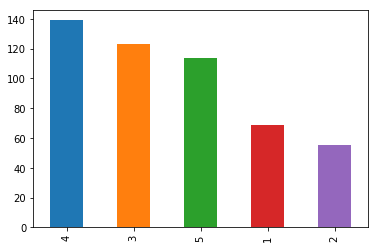

for Q26 column
3    137
4    127
5    103
1     67
2     66
Name: Q26, dtype: int64


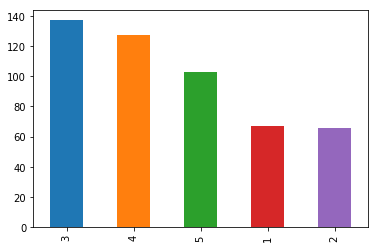

for Q27 column
3    125
4    120
5    103
1     82
2     70
Name: Q27, dtype: int64


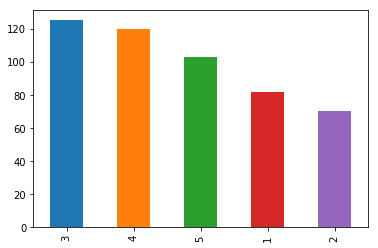

for Q28 column
3    129
4    127
5    126
1     69
2     49
Name: Q28, dtype: int64


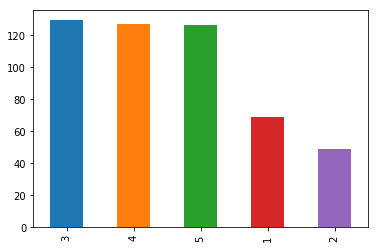

In [15]:
for i in ser.columns:
    print("for " + i + " column")
    print(ser[i].value_counts())
    ser[i].value_counts().plot.bar()
    plt.show()
    

### Max 

In [18]:
ser.max()

instr          3
class         13
nb.repeat      3
attendance     4
difficulty     5
Q1             5
Q2             5
Q3             5
Q4             5
Q5             5
Q6             5
Q7             5
Q8             5
Q9             5
Q10            5
Q11            5
Q12            5
Q13            5
Q14            5
Q15            5
Q16            5
Q17            5
Q18            5
Q19            5
Q20            5
Q21            5
Q22            5
Q23            5
Q24            5
Q25            5
Q26            5
Q27            5
Q28            5
dtype: int64

### Min

In [19]:
ser.min()

instr         1
class         1
nb.repeat     1
attendance    0
difficulty    1
Q1            1
Q2            1
Q3            1
Q4            1
Q5            1
Q6            1
Q7            1
Q8            1
Q9            1
Q10           1
Q11           1
Q12           1
Q13           1
Q14           1
Q15           1
Q16           1
Q17           1
Q18           1
Q19           1
Q20           1
Q21           1
Q22           1
Q23           1
Q24           1
Q25           1
Q26           1
Q27           1
Q28           1
dtype: int64

### Median

In [166]:
ser.median()

instr         3.0
class         7.0
nb.repeat     1.0
attendance    1.0
difficulty    3.0
Q1            3.0
Q2            3.0
Q3            3.0
Q4            3.0
Q5            3.0
Q6            3.0
Q7            3.0
Q8            3.0
Q9            3.0
Q10           3.0
Q11           3.0
Q12           3.0
Q13           3.0
Q14           4.0
Q15           3.0
Q16           3.0
Q17           4.0
Q18           3.0
Q19           3.0
Q20           3.0
Q21           3.0
Q22           4.0
Q23           3.0
Q24           3.0
Q25           4.0
Q26           3.0
Q27           3.0
Q28           4.0
dtype: float64

### Q1

In [21]:
ser.quantile(q = 0.25)

instr         2.0
class         4.0
nb.repeat     1.0
attendance    0.0
difficulty    1.0
Q1            2.0
Q2            2.0
Q3            2.0
Q4            2.0
Q5            2.0
Q6            2.0
Q7            2.0
Q8            2.0
Q9            2.0
Q10           2.0
Q11           2.0
Q12           2.0
Q13           2.0
Q14           3.0
Q15           3.0
Q16           2.0
Q17           3.0
Q18           2.0
Q19           3.0
Q20           3.0
Q21           3.0
Q22           3.0
Q23           2.0
Q24           2.0
Q25           3.0
Q26           2.0
Q27           2.0
Q28           3.0
Name: 0.25, dtype: float64

### Q3


In [22]:
ser.quantile(q = 0.75)

instr          3.0
class         11.0
nb.repeat      1.0
attendance     3.0
difficulty     4.0
Q1             4.0
Q2             4.0
Q3             4.0
Q4             4.0
Q5             4.0
Q6             4.0
Q7             4.0
Q8             4.0
Q9             4.0
Q10            4.0
Q11            4.0
Q12            4.0
Q13            4.0
Q14            4.0
Q15            4.0
Q16            4.0
Q17            4.0
Q18            4.0
Q19            4.0
Q20            4.0
Q21            4.0
Q22            4.0
Q23            4.0
Q24            4.0
Q25            4.0
Q26            4.0
Q27            4.0
Q28            5.0
Name: 0.75, dtype: float64

## Covariance table

In [23]:
ser.cov()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,0.481940,-0.061090,0.028208,-0.122204,-0.062870,-0.163687,-0.139567,-0.112329,-0.142253,-0.144898,-0.127375,-0.136537,-0.157299,-0.143367,-0.123495,-0.136802,-0.155295,-0.106365,-0.077162,-0.099503,-0.149082,-0.066381,-0.133820,-0.095198,-0.071150,-0.072729,-0.075671,-0.128914,-0.151126,-0.103343,-0.127768,-0.130148,-0.104497
class,-0.061090,14.178481,0.162289,-0.318858,-0.161832,-0.363246,-0.447010,-0.323675,-0.359094,-0.422701,-0.358557,-0.326802,-0.281752,-0.147355,-0.348032,-0.182661,-0.412012,-0.481928,-0.319295,-0.254938,-0.265820,-0.269375,-0.164593,-0.205066,-0.315287,-0.310008,-0.249138,-0.182156,-0.300669,-0.282717,-0.338160,-0.217251,-0.420457
nb.repeat,0.028208,0.162289,0.284774,-0.019459,0.151515,-0.067856,-0.058794,-0.043595,-0.058653,-0.052922,-0.050341,-0.071972,-0.047363,-0.068798,-0.053202,-0.031719,-0.029327,-0.057319,-0.063743,-0.071050,-0.053475,-0.046689,-0.052609,-0.059735,-0.053723,-0.071611,-0.067174,-0.056625,-0.053054,-0.058589,-0.036998,-0.049475,-0.054285
attendance,-0.122204,-0.318858,-0.019459,2.213527,0.922585,0.026653,0.121222,0.238818,0.190661,0.174028,0.203607,0.154248,0.103347,0.239780,0.181443,0.252385,0.155451,0.256934,0.292265,0.265872,0.137916,0.391363,0.181283,0.270220,0.306293,0.324790,0.309820,0.196152,0.153848,0.292144,0.241503,0.174830,0.315110
difficulty,-0.062870,-0.161832,0.151515,0.922585,1.847130,-0.059279,-0.067563,-0.012749,-0.066140,-0.048946,-0.030782,-0.035756,-0.082168,0.001022,-0.077844,-0.019407,-0.036076,0.023836,0.040834,0.051178,-0.043391,0.123058,-0.037186,0.008770,0.070894,0.039475,0.026934,-0.008353,-0.037118,0.049884,0.040709,-0.004537,0.067206
Q1,-0.163687,-0.363246,-0.067856,0.026653,-0.059279,1.903407,1.515711,1.325090,1.583647,1.479840,1.422044,1.470982,1.484208,1.364529,1.422124,1.338758,1.462164,1.284289,1.233347,1.281002,1.360962,1.144569,1.283287,1.241363,1.253387,1.241723,1.235671,1.348858,1.370381,1.247455,1.203727,1.370421,1.220120
Q2,-0.139567,-0.447010,-0.058794,0.121222,-0.067563,1.515711,1.727499,1.451154,1.558501,1.551808,1.473507,1.505343,1.456605,1.389319,1.456938,1.403471,1.444581,1.414505,1.384673,1.431715,1.486565,1.311146,1.409194,1.380665,1.384673,1.372236,1.366493,1.449026,1.452517,1.376120,1.345046,1.436216,1.345234
Q3,-0.112329,-0.323675,-0.043595,0.238818,-0.012749,1.325090,1.451154,1.692100,1.431335,1.527086,1.419319,1.416188,1.411058,1.366553,1.418429,1.389491,1.378994,1.445399,1.424481,1.437391,1.429796,1.376846,1.438485,1.420473,1.452537,1.406449,1.400882,1.428681,1.426449,1.433611,1.399747,1.407968,1.387527
Q4,-0.142253,-0.359094,-0.058653,0.190661,-0.066140,1.583647,1.558501,1.431335,1.808240,1.555255,1.495150,1.488329,1.485283,1.419279,1.444553,1.429563,1.437186,1.371279,1.374092,1.422918,1.464641,1.307279,1.365467,1.374092,1.372088,1.355824,1.358076,1.429066,1.422277,1.373595,1.329675,1.424032,1.351086
Q5,-0.144898,-0.422701,-0.052922,0.174028,-0.048946,1.479840,1.551808,1.527086,1.555255,1.746758,1.596152,1.580473,1.562196,1.475591,1.543471,1.463551,1.490052,1.517852,1.483431,1.496625,1.580633,1.367118,1.482982,1.437339,1.441347,1.388649,1.394950,1.497042,1.514822,1.414717,1.424545,1.496497,1.393491


## Correlation table

In [24]:
ser.corr()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,1.000000,-0.023370,0.076143,-0.118317,-0.066634,-0.170904,-0.152960,-0.124389,-0.152383,-0.157924,-0.139502,-0.147617,-0.168242,-0.158892,-0.137227,-0.147621,-0.169700,-0.117248,-0.086140,-0.110264,-0.160124,-0.073121,-0.146480,-0.104894,-0.077761,-0.080772,-0.083655,-0.141420,-0.161877,-0.113035,-0.142053,-0.138593,-0.113203
class,-0.023370,1.000000,0.080765,-0.056917,-0.031623,-0.069923,-0.090322,-0.066082,-0.070919,-0.084938,-0.072400,-0.065141,-0.055560,-0.030109,-0.071300,-0.036340,-0.083007,-0.097943,-0.065716,-0.052085,-0.052638,-0.054707,-0.033216,-0.041658,-0.063529,-0.063475,-0.050779,-0.036842,-0.059377,-0.057012,-0.069316,-0.042652,-0.083976
nb.repeat,0.076143,0.080765,1.000000,-0.024509,0.208909,-0.092166,-0.083825,-0.062802,-0.081736,-0.075036,-0.071724,-0.101227,-0.065901,-0.099191,-0.076907,-0.044527,-0.041690,-0.082196,-0.092572,-0.102426,-0.074718,-0.066906,-0.074915,-0.085625,-0.076383,-0.103461,-0.096608,-0.080811,-0.073928,-0.083368,-0.053512,-0.068538,-0.076502
attendance,-0.118317,-0.056917,-0.024509,1.000000,0.456263,0.012985,0.061991,0.123399,0.095300,0.088504,0.104051,0.077815,0.051578,0.123999,0.094077,0.127079,0.079263,0.132155,0.152240,0.137476,0.069119,0.201157,0.092591,0.138929,0.156199,0.168308,0.159817,0.100406,0.076894,0.149102,0.125287,0.086870,0.159283
difficulty,-0.066634,-0.031623,0.208909,0.456263,1.000000,-0.031614,-0.037823,-0.007212,-0.036190,-0.027249,-0.017220,-0.019746,-0.044891,0.000579,-0.044183,-0.010697,-0.020137,0.013421,0.023284,0.028969,-0.023805,0.069241,-0.020792,0.004936,0.039577,0.022393,0.015209,-0.004680,-0.020309,0.027870,0.023119,-0.002468,0.037189
Q1,-0.170904,-0.069923,-0.092166,0.012985,-0.031614,1.000000,0.835876,0.738357,0.853620,0.811582,0.783685,0.800248,0.798797,0.760968,0.795165,0.726923,0.803992,0.712363,0.692808,0.714299,0.735540,0.634417,0.706827,0.688258,0.689290,0.693912,0.687376,0.744575,0.738613,0.686576,0.673424,0.734321,0.665098
Q2,-0.152960,-0.090322,-0.083825,0.061991,-0.037823,0.835876,1.000000,0.848773,0.881800,0.893332,0.852389,0.859626,0.822887,0.813284,0.855101,0.799921,0.833785,0.823569,0.816455,0.837999,0.843337,0.762853,0.814737,0.803523,0.799321,0.804944,0.797913,0.839606,0.821777,0.795019,0.789868,0.807809,0.769729
Q3,-0.124389,-0.066082,-0.062802,0.123399,-0.007212,0.738357,0.848773,1.000000,0.818276,0.888248,0.829586,0.817130,0.805451,0.808282,0.841162,0.800194,0.804212,0.850314,0.848667,0.850076,0.819572,0.809415,0.840325,0.835292,0.847222,0.833598,0.826505,0.836432,0.815426,0.836851,0.830544,0.800161,0.802190
Q4,-0.152383,-0.070919,-0.081736,0.095300,-0.036190,0.853620,0.881800,0.818276,1.000000,0.875099,0.845379,0.830718,0.820140,0.812061,0.828687,0.796394,0.810786,0.780373,0.791920,0.814043,0.812137,0.743428,0.771629,0.781639,0.774171,0.777357,0.775092,0.809343,0.786498,0.775640,0.763209,0.782870,0.755621
Q5,-0.157924,-0.084938,-0.075036,0.088504,-0.027249,0.811582,0.893332,0.888248,0.875099,1.000000,0.918232,0.897540,0.877661,0.859012,0.900881,0.829553,0.855276,0.878856,0.869851,0.871149,0.891746,0.791022,0.852658,0.831881,0.827437,0.810069,0.810027,0.862633,0.852289,0.812799,0.831929,0.837061,0.792934


## Exploratory Data Analysis 

In [ ]:
pd.crosstab(ser['attendance'],ser['difficulty']).plot.bar(stacked = True)

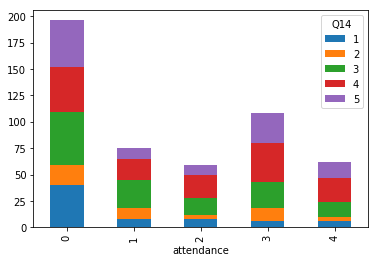

In [26]:
pd.crosstab(ser['attendance'],ser['Q14']).plot.bar(stacked = True)

### q14 - instructor came prepared for classes.
### as you can see more students with low attendance have given less rating to preparedness, meaning the professors should go prepared for every day class.


C:\Users\kishorkrishna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


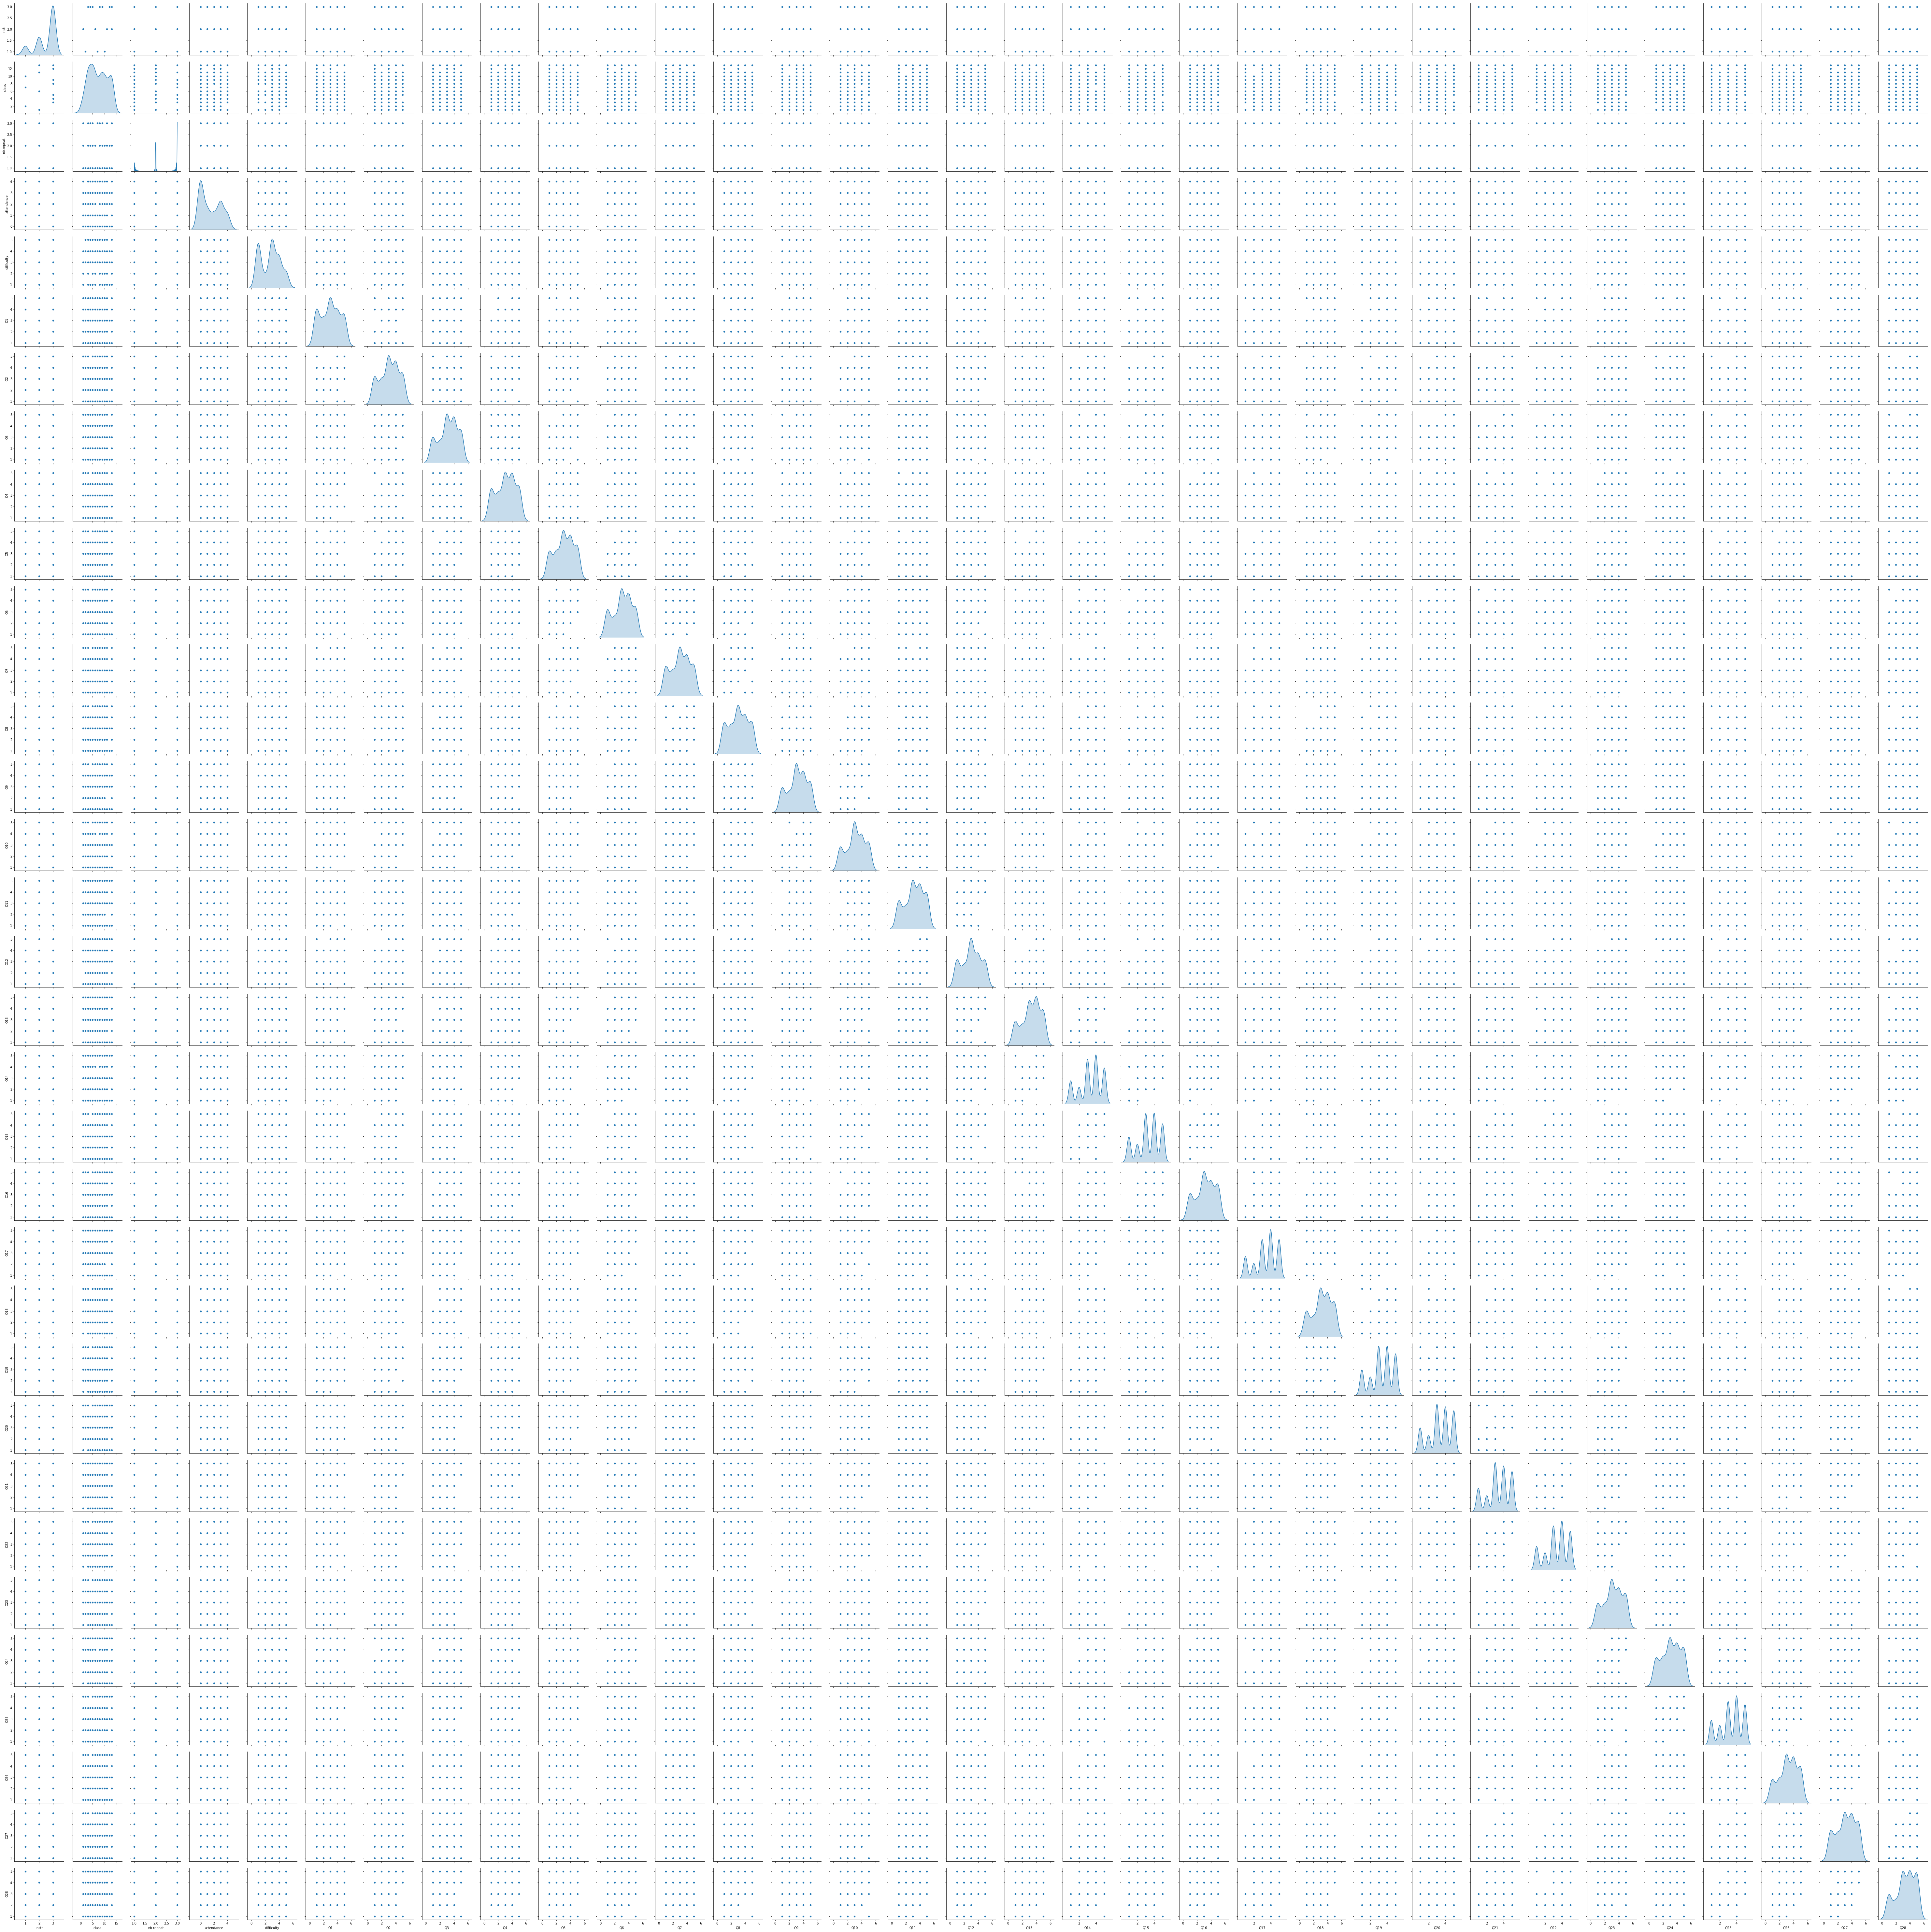

In [29]:
sns.pairplot(ser,diag_kind='kde')

### Scaling

In [30]:
sers = ser.apply(zscore)

In [34]:
sers[:10]

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.674814,0.166416,-0.401420,-1.029399,-1.283022,1.465616,1.421142,1.368212,1.396495,1.405712,1.400384,1.425981,1.440442,1.394000,1.417727,1.346770,1.471667,1.312956,1.284662,1.292178,1.334531,1.214051,1.341802,1.267983,1.257702,1.264137,1.259899,1.366095,1.353226,1.255667,1.339708,1.343842,1.216536
1,0.674814,0.166416,-0.401420,1.661840,0.190023,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,-0.121773,-0.076633,-0.046082,-0.146331,-0.126638,-0.152974,-0.047081,-0.219081,-0.266862,-0.247963,-0.158233,-0.316909,-0.179515,-0.263398,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078
2,0.674814,1.495614,-0.401420,0.989030,0.190023,0.014511,-0.102054,-0.170834,-0.092306,-0.109064,-0.121773,-0.076633,-0.046082,-0.146331,-0.126638,-0.152974,-0.047081,-0.219081,-0.266862,-0.247963,-0.158233,-0.316909,-0.179515,-0.263398,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,-0.264511,-0.205515,-0.136160,-0.289078
3,0.674814,-0.631104,-0.401420,-1.029399,-1.283022,-1.436594,-1.625250,-1.709880,-1.581107,-1.623840,-1.643929,-1.579248,-0.789344,-0.146331,-0.126638,-1.652718,-1.565830,-1.751118,-1.818386,-1.788104,-1.650996,-1.847868,-1.700833,-1.794779,-1.780226,-1.822889,-1.813026,-1.683224,-1.624168,-1.784689,-1.750737,-1.616163,-1.794692
4,0.674814,-1.162783,-0.401420,0.989030,0.926545,-0.711042,-0.863652,0.598689,-0.836706,-0.109064,-0.121773,-0.076633,-0.789344,-0.146331,-0.126638,-0.152974,0.712293,0.546937,0.508900,0.522108,-0.158233,0.448571,0.581143,0.502293,0.498220,-0.279376,0.491668,-0.158565,-0.135471,-0.264511,-0.205515,-0.876162,0.463729
5,-0.767096,-0.365264,-0.401420,0.316221,-0.546500,0.740064,0.659544,0.598689,0.652095,0.648324,0.639306,0.674674,0.697180,0.623834,0.645545,0.596898,0.712293,0.546937,0.508900,0.522108,0.588149,0.448571,0.581143,0.502293,0.498220,0.492381,0.491668,0.603765,0.608877,0.495578,0.567097,0.603841,0.463729
6,0.674814,-1.162783,-0.401420,-0.356589,-0.546500,-0.711042,-0.863652,-0.940357,-0.836706,-0.866452,-0.882851,-0.827941,-0.789344,-0.916497,-0.898821,-0.902846,-0.806456,-0.985100,-1.042624,-1.018033,-0.904615,-1.082388,-0.940174,-1.029088,-1.020744,-1.051132,-1.044795,-0.920894,-0.879820,-1.024600,-0.978126,-0.876162,-1.041885
7,0.674814,1.495614,3.350166,1.661840,0.926545,1.465616,1.421142,1.368212,1.396495,1.405712,1.400384,1.425981,1.440442,1.394000,1.417727,1.346770,1.471667,1.312956,1.284662,1.292178,1.334531,1.214051,1.341802,1.267983,1.257702,1.264137,1.259899,1.366095,1.353226,1.255667,1.339708,1.343842,1.216536
8,-0.767096,0.963935,1.474373,-1.029399,0.926545,-1.436594,-1.625250,0.598689,-1.581107,-1.623840,-1.643929,-1.579248,-1.532606,-1.686663,-1.671003,-1.652718,-1.565830,-0.219081,-1.042624,-0.247963,-0.904615,0.448571,0.581143,0.502293,-0.261262,-0.279376,-0.276563,-0.158565,-0.135471,0.495578,0.567097,0.603841,0.463729
9,-0.767096,-0.365264,1.474373,0.989030,-0.546500,-1.436594,-0.863652,-0.170834,-0.092306,-0.109064,-0.121773,-0.076633,-0.046082,-0.916497,-0.126638,0.596898,-1.565830,0.546937,0.508900,0.522108,1.334531,0.448571,0.581143,-0.263398,-0.261262,-0.279376,0.491668,-0.158565,-0.879820,-0.264511,1.339708,-1.616163,1.216536


### K-means

### The no of clusters could be assumed as 3 - for 3 distinct categories 1)positive feeback 2)negative feedback and 3)neutral feedback

In [44]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(sers)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,16500.000000
1,2,8715.634619
2,3,6134.622216
3,4,5350.546090
4,5,4963.472002
5,6,4784.132012
6,7,4577.003780
7,8,4422.944157
8,9,4321.882041
9,10,4201.217809


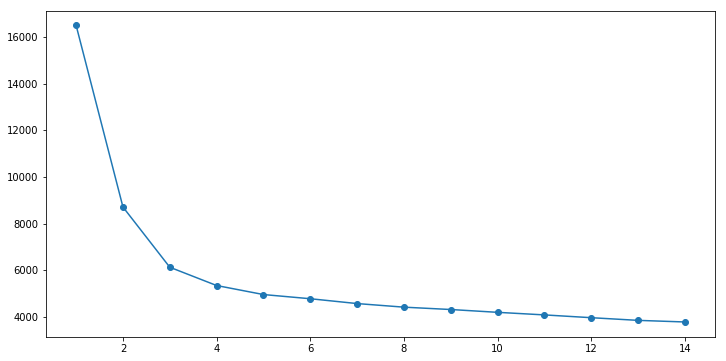

In [45]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### As we can see from the above Elbow plot- our assumed cluster size of 3 is correct as the plot elbows at 3.
### So the no of labels can either be 2/3
### Depending on the problem statement


### Dendogram

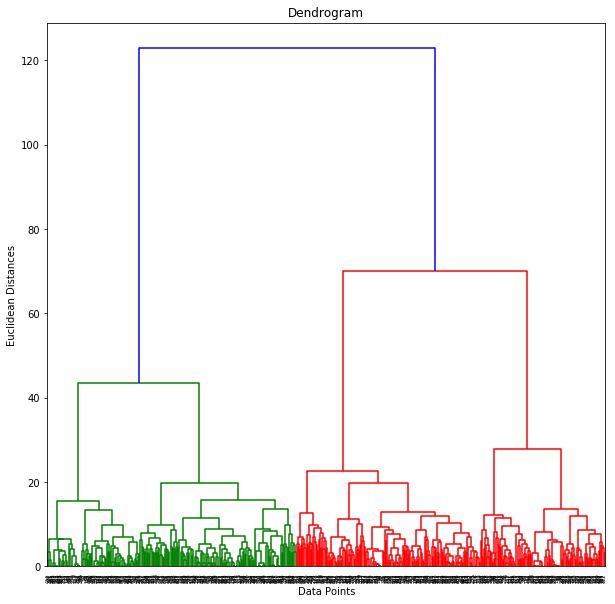

In [113]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(sers, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

### from dendogram also we can see that there are 3 different classes 

## Apply Clustering:

In [46]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=100)
kmeans.fit(sers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [47]:
centroids = kmeans.cluster_centers_
centroids


array([[ 0.13409767, -0.0542313 ,  0.05814958,  0.08073718,  0.14951405,
        -0.22492131, -0.155366  , -0.12851037, -0.18163371, -0.19995043,
        -0.13699408, -0.17430331, -0.21331623, -0.15403311, -0.16524707,
        -0.13797648, -0.19136233, -0.06970768, -0.03801233, -0.05929543,
        -0.13957338, -0.01454411, -0.10344961, -0.06048955, -0.05620167,
        -0.05556647, -0.05377619, -0.17762284, -0.14291491, -0.05548651,
        -0.097349  , -0.17316031, -0.03688755],
       [ 0.11623617,  0.14725605,  0.08865234, -0.2474849 , -0.10856738,
        -1.09669568, -1.29591055, -1.35631575, -1.25249737, -1.33726063,
        -1.33538371, -1.27466404, -1.24467612, -1.31198744, -1.35099952,
        -1.26764875, -1.25797543, -1.43366902, -1.46195458, -1.4689755 ,
        -1.38875415, -1.42030257, -1.38560523, -1.42917856, -1.43127478,
        -1.43353438, -1.43237082, -1.33983234, -1.34252304, -1.42861146,
        -1.39575334, -1.30949565, -1.40133361],
       [-0.21016799, -0.0290

In [97]:
centroid_df = pd.DataFrame(centroids, columns = list(sers))
centroid_df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.134098,-0.054231,0.058150,0.080737,0.149514,-0.224921,-0.155366,-0.128510,-0.181634,-0.199950,-0.136994,-0.174303,-0.213316,-0.154033,-0.165247,-0.137976,-0.191362,-0.069708,-0.038012,-0.059295,-0.139573,-0.014544,-0.103450,-0.060490,-0.056202,-0.055566,-0.053776,-0.177623,-0.142915,-0.055487,-0.097349,-0.173160,-0.036888
1,0.116236,0.147256,0.088652,-0.247485,-0.108567,-1.096696,-1.295911,-1.356316,-1.252497,-1.337261,-1.335384,-1.274664,-1.244676,-1.311987,-1.351000,-1.267649,-1.257975,-1.433669,-1.461955,-1.468975,-1.388754,-1.420303,-1.385605,-1.429179,-1.431275,-1.433534,-1.432371,-1.339832,-1.342523,-1.428611,-1.395753,-1.309496,-1.401334
2,-0.210168,-0.029096,-0.113600,0.059912,-0.094454,0.882103,0.925499,0.932556,0.927799,0.996963,0.929240,0.933060,0.956732,0.933530,0.968309,0.890499,0.941311,0.915761,0.898833,0.925478,0.963314,0.849537,0.923239,0.903369,0.900063,0.900718,0.898140,0.974846,0.939699,0.897742,0.922743,0.952307,0.862040


In [98]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

0    200
2    189
1    111
dtype: int64


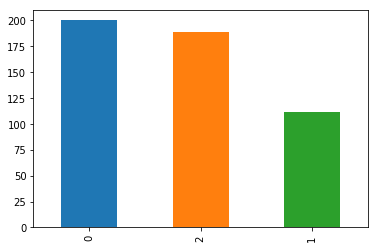

In [99]:
g = pd.Series(kmeans.labels_)
print(g.value_counts())
g.value_counts().plot.bar()

In [100]:
# labels appended to original dataframe
ser_df_labeled = ser.join(df_labels)

In [101]:
df_analysis = (ser_df_labeled.groupby(['labels'] , axis=0)).head(4177)
df_analysis

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels
0,3,8,1,0,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2
1,3,8,1,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
2,3,13,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
3,3,5,1,0,1,1,1,1,1,1,1,1,2,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,3,3,1,3,4,2,2,4,2,3,3,3,2,3,3,3,4,4,4,4,3,4,4,4,4,3,4,3,3,3,3,2,4,0
5,2,6,1,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2
6,3,3,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
7,3,13,3,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2
8,2,11,2,0,4,1,1,4,1,1,1,1,1,1,1,1,1,3,2,3,2,4,4,4,3,3,3,3,3,4,4,4,4,0
9,2,6,2,3,2,1,2,3,3,3,3,3,3,2,3,4,1,4,4,4,5,4,4,3,3,3,4,3,2,3,5,1,5,0


In [102]:
from mpl_toolkits.mplot3d import Axes3D


Text(0.5, 0.92, '3D plot of KMeans Clustering')

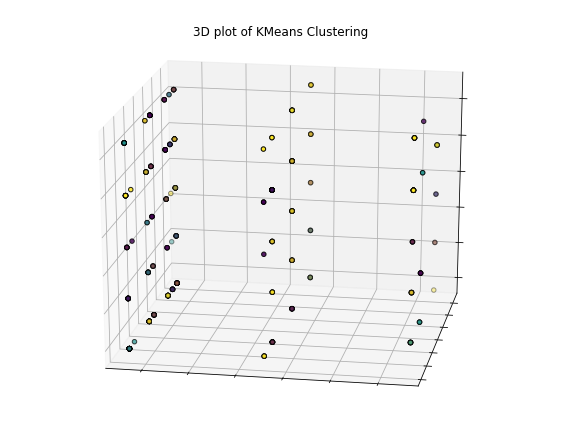

In [103]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(sers)
labels = kmeans.labels_
ax.scatter(sers.iloc[:, 0], sers.iloc[:, 1], sers.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('3D plot of KMeans Clustering')

# 6. Split dataset into train and test 

In [125]:
df_analysis['labels'] = df_analysis['labels'].astype(int)

In [126]:
y = df_analysis['labels']
x = df_analysis.drop('labels',axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=20, test_size=0.3)
# ascertain this statistically by checking their shape
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(350, 33)
(150, 33)
(350,)
(150,)


### Z-Transform

In [127]:
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Random-Forest


In [142]:

# Random forest
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(xtrain,ytrain)

#predict the model
ypred=clf.predict(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [143]:
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 


Confusion Matrix : 
 [[58  1  0]
 [ 1 35  0]
 [ 1  0 54]]
Accuracy :  0.98


## Decision Tree

In [144]:
y = df_analysis['labels']
x = df_analysis.drop('labels',axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=20, test_size=0.3)

sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

# DECISION TREE
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(xtrain, ytrain)
# Predicting the Test set results
ypred = classifier.predict(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [145]:
# MODEL EVALUATION
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 
print(classification_report(ytest, ypred))

Confusion Matrix : 
 [[53  4  2]
 [ 1 35  0]
 [ 2  0 53]]
Accuracy :  0.94
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.90      0.97      0.93        36
           2       0.96      0.96      0.96        55

   micro avg       0.94      0.94      0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



## KNN 

In [140]:
y = df_analysis['labels']
x = df_analysis.drop('labels',axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=20, test_size=0.3)

sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain, ytrain)
## predict the model
ypred = classifier.predict(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [141]:
# MODEL EVALUATION
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 
print(classification_report(ytest, ypred))

Confusion Matrix : 
 [[55  2  2]
 [ 0 36  0]
 [ 0  0 55]]
Accuracy :  0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.95      1.00      0.97        36
           2       0.96      1.00      0.98        55

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.97      0.97      0.97       150



In [132]:
print(classification_report(ytest, ypred) )

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.95      0.97      0.96        36
           2       1.00      0.98      0.99        55

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Precision

### Recall

## applying PCA to all the previous supervised models

### Random Forest

In [147]:
y = df_analysis['labels']
x = df_analysis.drop('labels',axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=20, test_size=0.3)

sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [148]:
pca = PCA()
xtrain2 = pca.fit_transform(xtrain)
xtest2 = pca.transform(xtest)

In [149]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([7.07569947e-01, 4.84741167e-02, 4.12951123e-02, 3.40011296e-02,
       2.97250207e-02, 2.38630025e-02, 1.53614798e-02, 1.19494888e-02,
       1.03482291e-02, 8.57896057e-03, 7.37536569e-03, 6.65479814e-03,
       6.30445299e-03, 5.22107372e-03, 4.56527041e-03, 3.98699501e-03,
       3.79358181e-03, 3.59490246e-03, 3.52707273e-03, 3.37568990e-03,
       2.85618972e-03, 2.49414947e-03, 2.08929397e-03, 1.93127390e-03,
       1.78297827e-03, 1.58643549e-03, 1.41106761e-03, 1.38906646e-03,
       1.19087170e-03, 1.16618996e-03, 9.29174789e-04, 9.10317118e-04,
       6.97301109e-04])

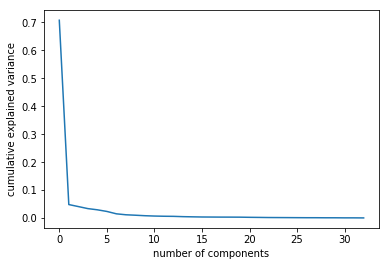

In [150]:
#explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [151]:
pca = PCA(n_components= 2)
xtrain2 = pca.fit_transform(xtrain)
xtest2 = pca.transform(xtest)

In [152]:
# Random forest
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(xtrain2,ytrain)

#predict the model
ypred=clf.predict(xtest2)

In [153]:
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 

Confusion Matrix : 
 [[59  0  0]
 [ 0 36  0]
 [ 0  0 55]]
Accuracy :  1.0


## Decision Trees

In [158]:
y = df_analysis['labels']
x = df_analysis.drop('labels',axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=20, test_size=0.3)

sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [159]:
pca = PCA(n_components= 2)
xtrain2 = pca.fit_transform(xtrain)
xtest2 = pca.transform(xtest)

In [160]:
# DECISION TREE
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(xtrain, ytrain)
# Predicting the Test set results
ypred = classifier.predict(xtest)

In [161]:
# MODEL EVALUATION
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 
print(classification_report(ytest, ypred))

Confusion Matrix : 
 [[53  4  2]
 [ 1 35  0]
 [ 2  0 53]]
Accuracy :  0.94
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.90      0.97      0.93        36
           2       0.96      0.96      0.96        55

   micro avg       0.94      0.94      0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



## KNN 

In [162]:
y = df_analysis['labels']
x = df_analysis.drop('labels',axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=20, test_size=0.3)

sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest)

C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kishorkrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [163]:
pca = PCA(n_components= 2)
xtrain2 = pca.fit_transform(xtrain)
xtest2 = pca.transform(xtest)

In [164]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(xtrain, ytrain)
## predict the model
ypred = classifier.predict(xtest)

In [165]:
# MODEL EVALUATION
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, ypred)) 
print(classification_report(ytest, ypred))

Confusion Matrix : 
 [[55  2  2]
 [ 0 36  0]
 [ 0  0 55]]
Accuracy :  0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.95      1.00      0.97        36
           2       0.96      1.00      0.98        55

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.97      0.97      0.97       150



# Summarization:

### The overall fit of the model is 97 - 98% for various models(kmeans and hierarchical algorithms),before using the PCA method

### The overall fit of the model is 98 - 100% for some models, the accuracy increased especially after using the PCA method

### Since the accuracy is so high,so is the precision and recall the model is a good model with high accuracy with the results.


## Business interpretation/explanation of the model

### using the outputs from the model they could drastically increase the performance of teachers or replace them with newer teachers.
### since the model classifies the whole data into 3 divisions, whether that particular staff got positive/negative/neutral rating depending on that the education insitituition they are from to improve the quality of teaching.With better quality of teaching, the higher the performance of the students will be thereby in turn again increasing the rating of the Education instituition.
